# 2. Factorización PALU

## 2.1 Contexto: 

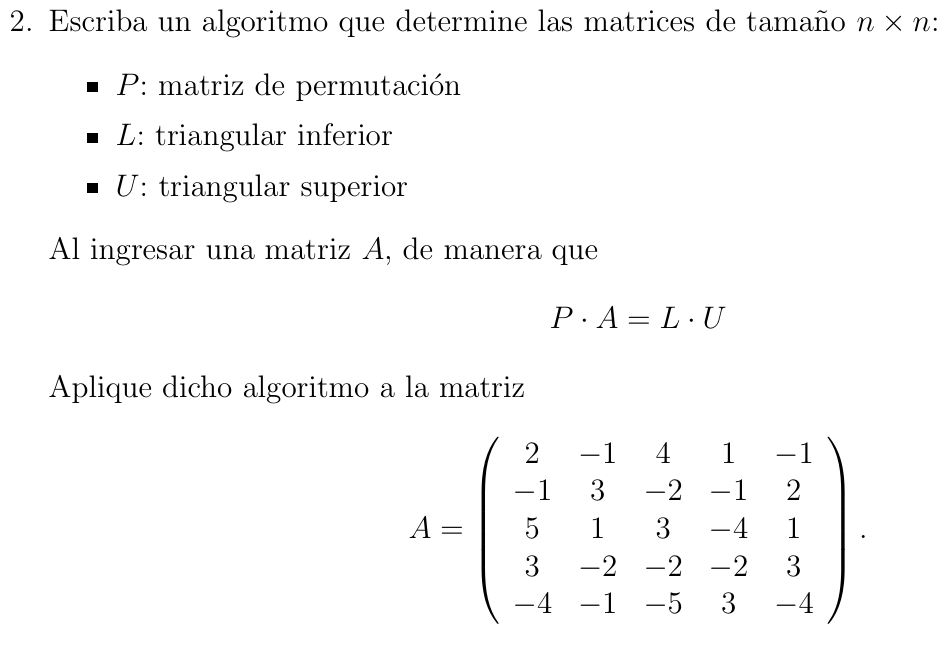

### 2.2  Librerías necesarias para trabajar.

In [1]:
#Se importa numpy la cual
#es una libreria de python para
# realizar calculos numericos entre otras cosas
import numpy as np

#Librería tabulate para mostrar los datos en forma de tabla.
from tabulate import tabulate

### 2.3 Implementación de la función para calcular la factorización PALU de una matriz cuadrada. 

El código realiza la factorización PA=LU, utilizando la función establecida
`perform_PLU_decomposition()`.
Primeramente en este método se busca el pivote, 
se hace intercambio de filas, luego se busca 
el factor que será el valor que se multiplicará 
por cada entrada de una respectiva fila y se suma a la siguiente,
y esto se vuelve a empezar y se realizará n-1 cantidad de veces. 
(n-1 es porque las matrices empiezan desde el 0 no en 1)
Una vez finalizado el ciclo hasta n-1, se imprimen la matriz original (A), U, L y P.

Para verificar que el P.A = L.U, con el método np.dot() de la librería numpy, se multiplican las matrices por lo tanto  np.dot(P,A) y np.dot(L,U) deben dar el mismo resultado.


In [2]:
def perform_PLU_decomposition(A):
    tamano = np.shape(A)
    n = tamano[0]
    L = np.identity(n, dtype=float)
    P = np.identity(n)
    U = np.copy(A)

    for i in range(0, n-1):
        columna = abs(U[i:, i])
        nMayor = np.argmax(columna)
        if nMayor != 0:
            tempU = np.copy(U[i, :])
            tempP = np.copy(P[i, :])
            U[i, :] = U[nMayor+i, :]
            P[i, :] = P[nMayor+i, :]
            U[nMayor+i, :] = tempU
            P[nMayor+i, :] = tempP
            for z in range(i):
                tempL = L[i, z]
                L[i, z] = L[nMayor+i, z]
                L[nMayor+i, z] = tempL
        pivote = U[i, i]
        siguiente = i+1
        for k in range(siguiente, n, 1):
            factor = U[k, i] / pivote
            U[k, :] = U[k, :] - U[i, :] * factor
            L[k, i] = factor

    print("Matriz Original A: ")
    print(tabulate(A, tablefmt="fancy_grid"))
    print('Matriz U: ')
    print(tabulate(U, tablefmt="fancy_grid"))
    print('matriz L: ')
    print(tabulate(L, tablefmt="fancy_grid"))
    print('matriz P: ')
    print(tabulate(P, tablefmt="fancy_grid"))
    print("PA")
    print(tabulate(np.dot(P, A), tablefmt="fancy_grid"))
    print("LU")
    print(tabulate(np.dot(L, U), tablefmt="fancy_grid"))

### 2.4 Inputa de valores para probar el funcionamiento de la función `perform_PLU_decomposition()`. 

In [3]:
#Valores por defecto de la matriz A,
# estos valores se pueden
# cambiar por cualquier otra matriz cuadrada.
A = np.array([[2,-1,4,1,-1],
              [-1,3,-2,-1,2],
              [5,1,3,-4,1],
              [3,-2,-2,-2,3],
              [-4,-1,-5,3,-4]], dtype=float)
perform_PLU_decomposition(A)

Matriz Original A: 
╒════╤════╤════╤════╤════╕
│  2 │ -1 │  4 │  1 │ -1 │
├────┼────┼────┼────┼────┤
│ -1 │  3 │ -2 │ -1 │  2 │
├────┼────┼────┼────┼────┤
│  5 │  1 │  3 │ -4 │  1 │
├────┼────┼────┼────┼────┤
│  3 │ -2 │ -2 │ -2 │  3 │
├────┼────┼────┼────┼────┤
│ -4 │ -1 │ -5 │  3 │ -4 │
╘════╧════╧════╧════╧════╛
Matriz U: 
╒═══╤═════╤═════════╤══════════╤══════════╕
│ 5 │ 1   │  3      │ -4       │  1       │
├───┼─────┼─────────┼──────────┼──────────┤
│ 0 │ 3.2 │ -1.4    │ -1.8     │  2.2     │
├───┼─────┼─────────┼──────────┼──────────┤
│ 0 │ 0   │ -4.9375 │ -1.0625  │  4.1875  │
├───┼─────┼─────────┼──────────┼──────────┤
│ 0 │ 0   │  0      │  1.34177 │  1.41772 │
├───┼─────┼─────────┼──────────┼──────────┤
│ 0 │ 0   │  0      │  0       │ -5.62264 │
╘═══╧═════╧═════════╧══════════╧══════════╛
matriz L: 
╒══════╤═════════╤═══════════╤══════════╤═══╕
│  1   │  0      │  0        │ 0        │ 0 │
├──────┼─────────┼───────────┼──────────┼───┤
│ -0.2 │  1      │  0        │ 0       